In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('heart.csv', delimiter=',')

In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
##ERROR CORRECTION
def remove_outlier(column):
    column=column.copy()
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1 
    threshold = 1.5 * IQR 
    outlier_mask = (column < Q1 - threshold ) | (column > Q3 + threshold) 
    return column[~outlier_mask]
    

In [7]:
col_name = ['cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'] 
for col in col_name :
    df[col] = remove_outlier(df[col])
    

In [8]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,NaN,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,68,1,0,144.0,193.0,NaN,1,141.0,0,3.4,1,2.0,3.0,0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,0


In [9]:
df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,NaN,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,68,1,0,144.0,193.0,NaN,1,141.0,0,3.4,1,2.0,3.0,0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,0


In [10]:
df.fillna(df.mean(numeric_only=True))

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0,0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,0


In [11]:
import matplotlib.pyplot as mt
import seaborn as sb

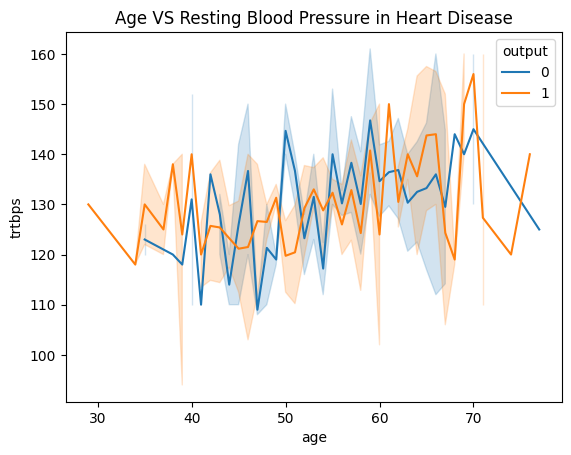

In [12]:
##CREATING LINEPLOT
sb.lineplot(data=df, x='age' , y='trtbps' , hue='output')
mt.title('Age VS Resting Blood Pressure in Heart Disease')
mt.show()

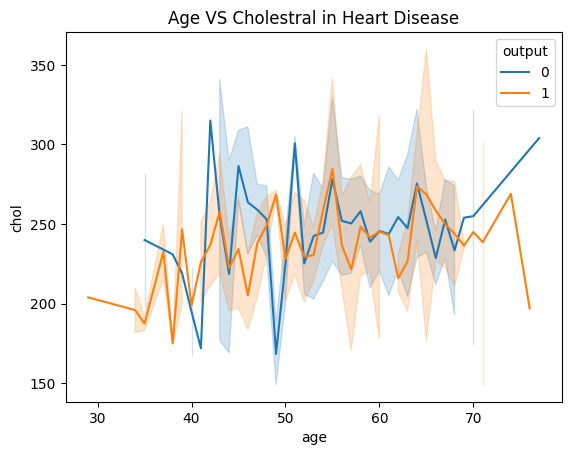

In [13]:
sb.lineplot(data=df,x='age',y='chol',hue='output' )
mt.title('Age VS Cholestral in Heart Disease')
mt.show()

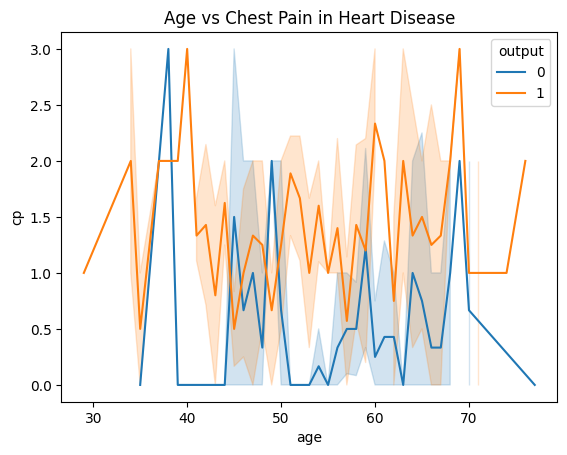

In [14]:
sb.lineplot(data=df,x='age',y='cp',hue='output')
mt.title('Age vs Chest Pain in Heart Disease')
mt.show()

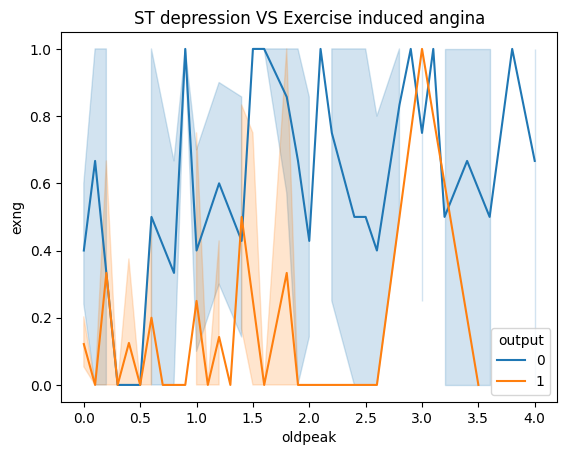

In [15]:
sb.lineplot(data=df,x='oldpeak',y='exng',hue='output')
mt.title('ST depression VS Exercise induced angina')
mt.show()

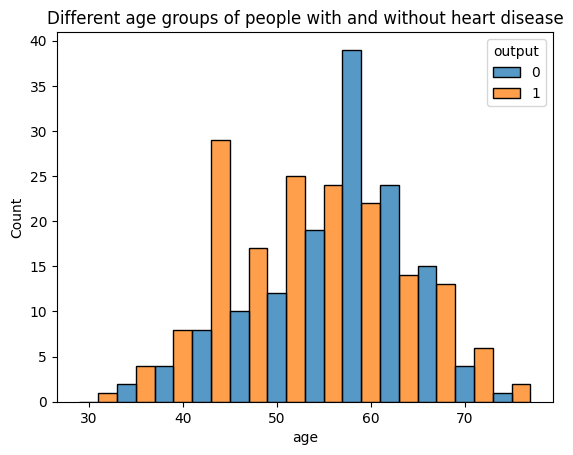

In [16]:
sb.histplot(data=df,x='age',hue='output', multiple='dodge')
mt.title('Different age groups of people with and without heart disease')
mt.show()

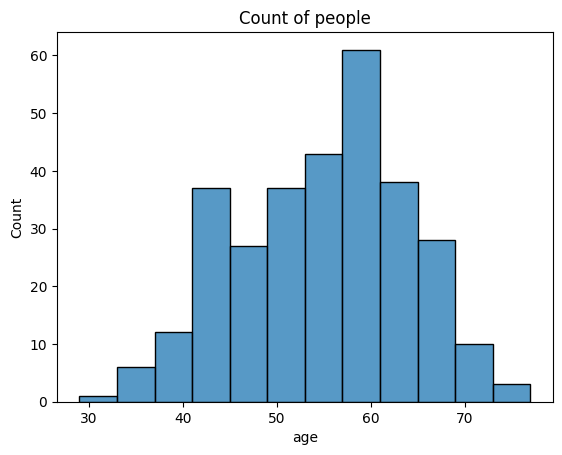

In [17]:
sb.histplot(data=df,x='age')
mt.title('Count of people')
mt.show()

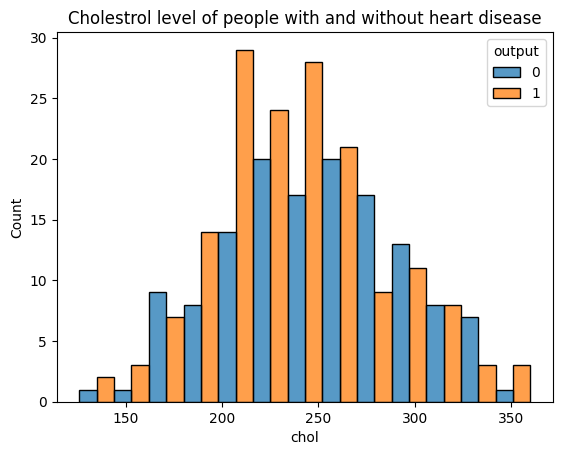

In [18]:
sb.histplot(data=df,x='chol',hue='output',multiple='dodge')
mt.title('Cholestrol level of people with and without heart disease')
mt.show()

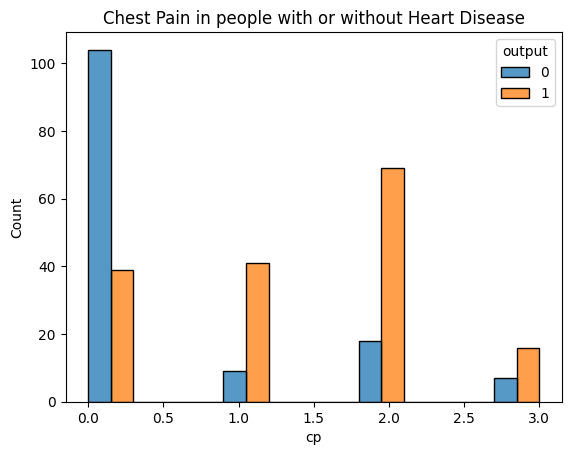

In [19]:
sb.histplot(data=df,x='cp',hue='output' , multiple='dodge')
mt.title('Chest Pain in people with or without Heart Disease')
mt.show()
##Some people (40) who might have a heart disease may have cp level 0.0 

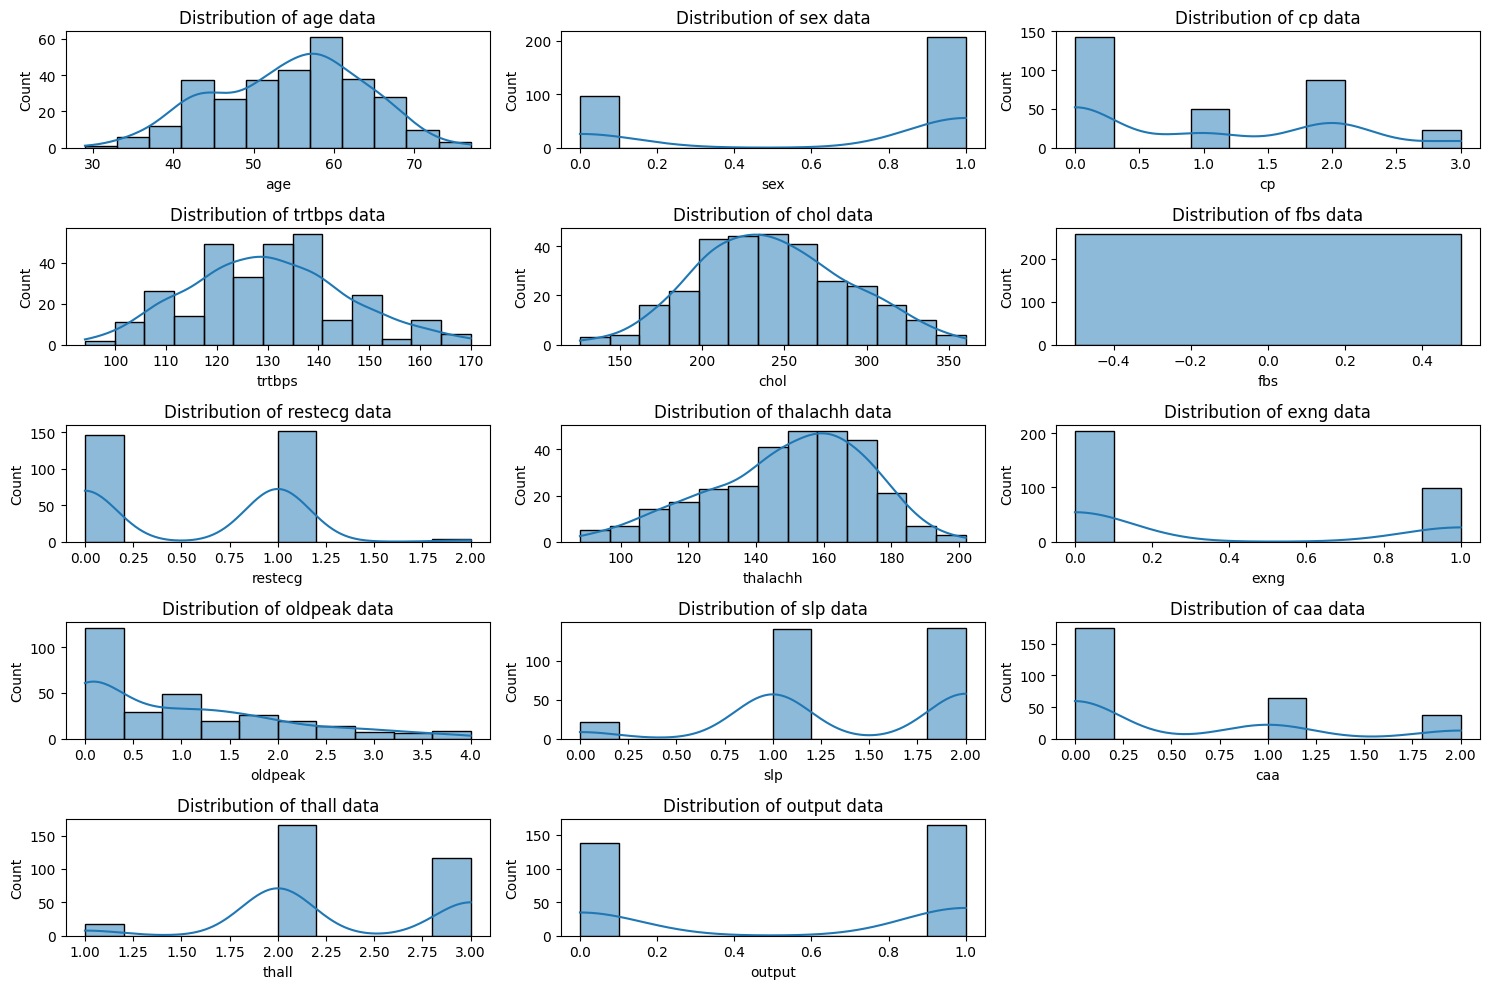

In [20]:
mt.figure(figsize=(15,10))
for i , col in enumerate(df.columns , 1):
    mt.subplot(5,3,i)
    mt.title(f"Distribution of {col} data")
    sb.histplot(df[col],kde=True)
mt.tight_layout()
mt.show()

In [21]:
# The KDE curve (Kernel Density Estimation) in a plot is like a smooth line that shows the overall shape of your data distribution.
# What it does: It helps you see where most of your data points are grouped and gives a smooth curve instead of the blocky look of a histogram.
# Why it's useful: The KDE line makes it easier to understand if your data has any patterns, like peaks (where there’s a lot of data) or valleys (where there’s less data).
# What you can learn: You can tell if your data is clustered around certain values or if it's spread out. It also shows if the data is normal (bell-shaped) or skewed.

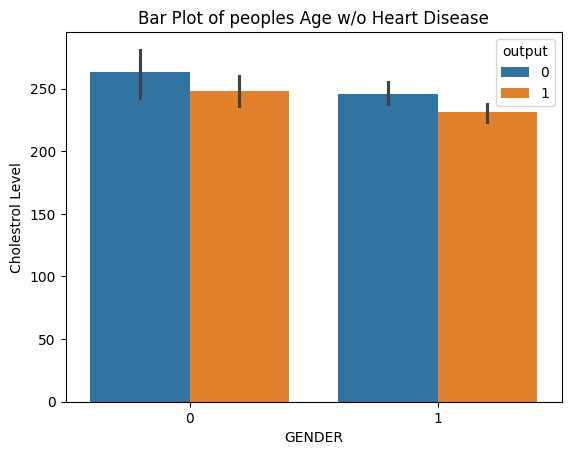

In [22]:
sb.barplot(data=df,x='sex',  y ='chol' , hue='output' , dodge=True)
mt.title('Bar Plot of peoples Age w/o Heart Disease')
mt.xlabel('GENDER')
mt.ylabel('Cholestrol Level')
mt.show()

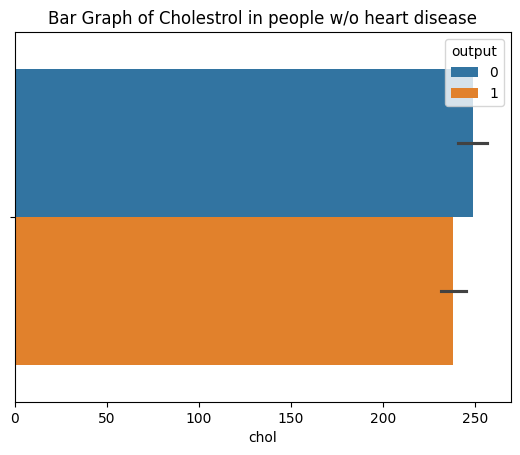

In [23]:
sb.barplot(data=df,x='chol',hue='output')
mt.title('Bar Graph of Cholestrol in people w/o heart disease')
mt.show()

In [24]:
col_name_pie = ['cp','trtbps','chol','fbs','exng','oldpeak','caa'] 

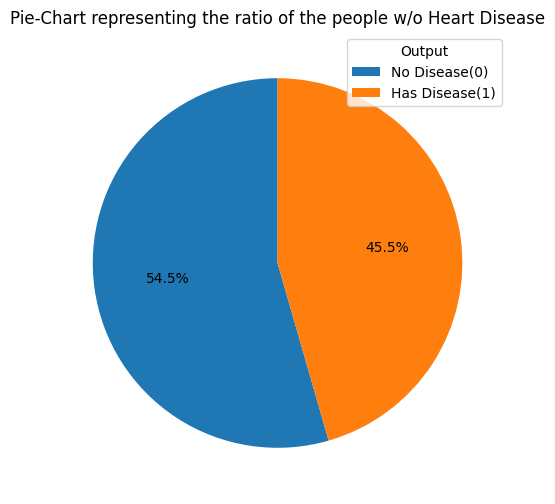

In [25]:
mt.figure(figsize=(6,6))
output_count = df['output'].value_counts()
mt.title('Pie-Chart representing the ratio of the people w/o Heart Disease')
mt.pie(output_count, autopct='%1.1f%%' , startangle=90)
mt.legend(title='Output' , labels=['No Disease(0)','Has Disease(1)'])
mt.show()

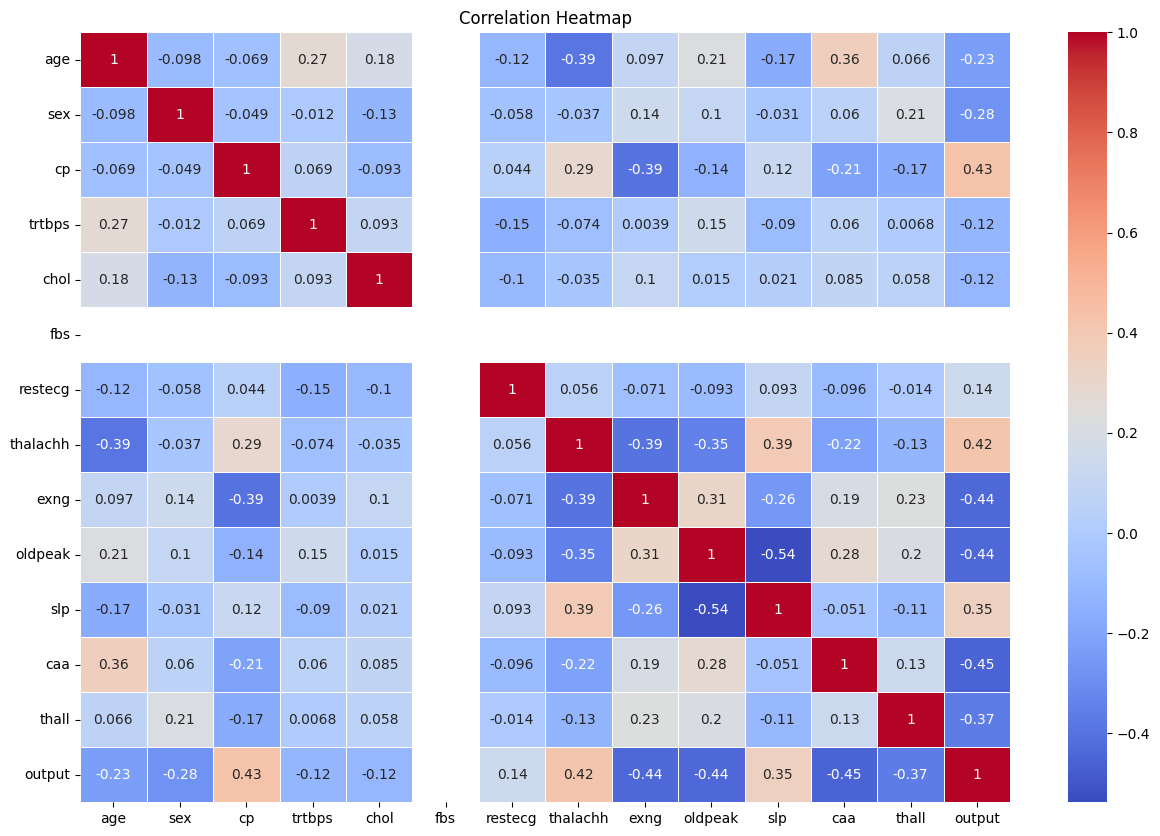

In [26]:
mt.figure(figsize=(15, 10))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
mt.title("Correlation Heatmap")
mt.show()

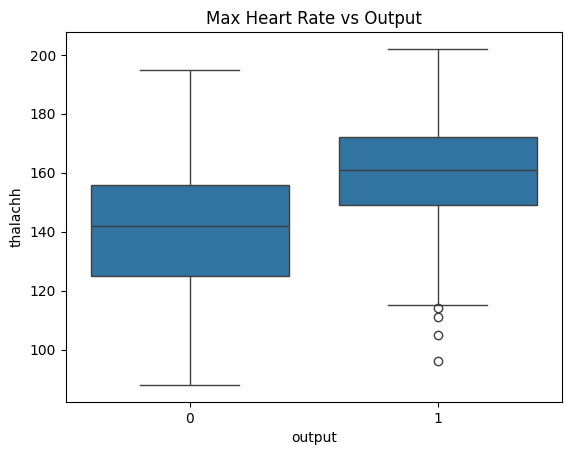

In [27]:
sb.boxplot(x='output', y='thalachh', data=df)
mt.title("Max Heart Rate vs Output")
mt.show()

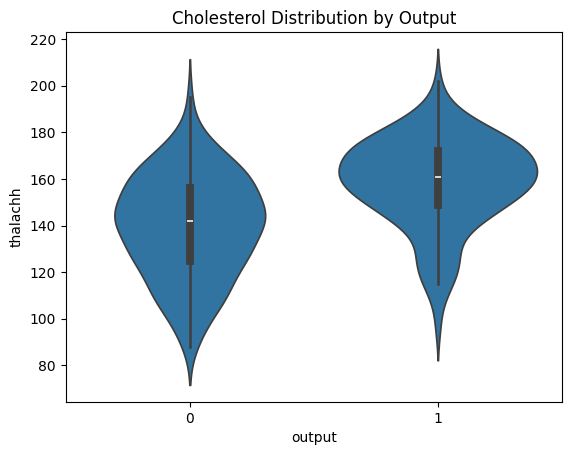

In [28]:
sb.violinplot(x='output', y='thalachh', data=df)
mt.title("Cholesterol Distribution by Output")
mt.show()


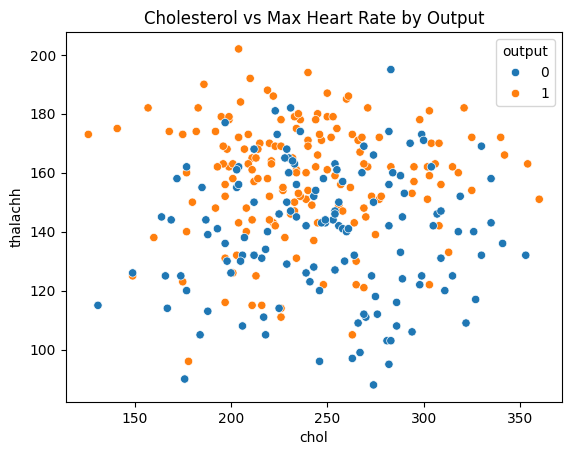

In [29]:
sb.scatterplot(x='chol', y='thalachh', hue='output', data=df)
mt.title("Cholesterol vs Max Heart Rate by Output")
mt.show()


In [32]:
df=df.drop('fbs' , axis=1)



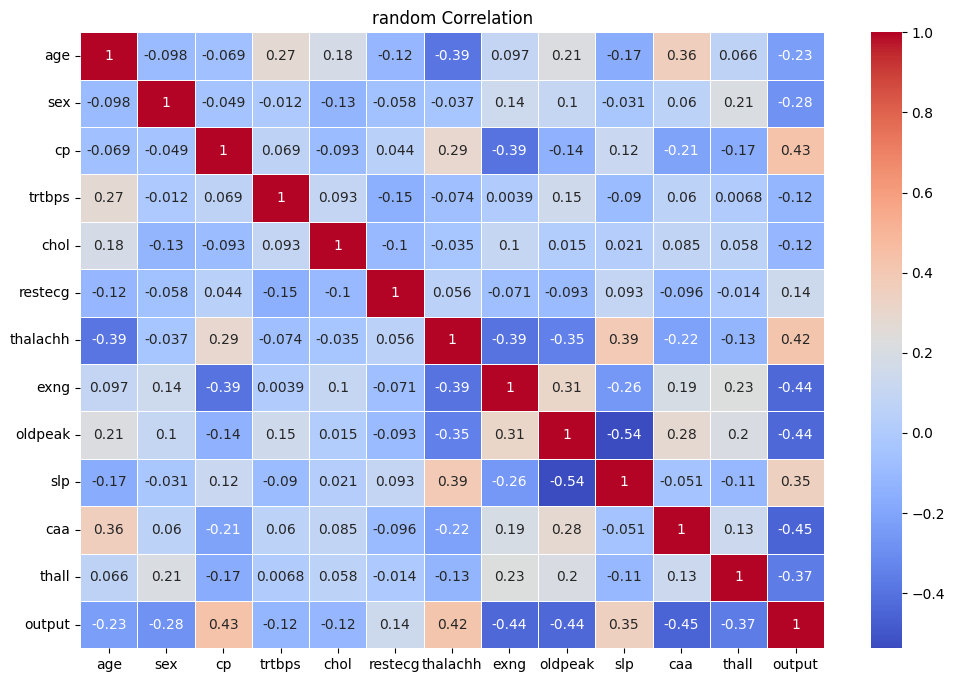

In [33]:
mt.figure(figsize=(12,8))
sb.heatmap(df.corr(),annot=True, linewidth=0.5 , cmap='coolwarm')
mt.title("random Correlation")
mt.show()

In [34]:
import numpy as np

row = df.iloc[0,:]
values= pd.to_numeric(row.values,errors='coerce')
labels= row.index

In [35]:
valid = ~np.isnan(values)
values=values[valid]
labels=labels[valid]

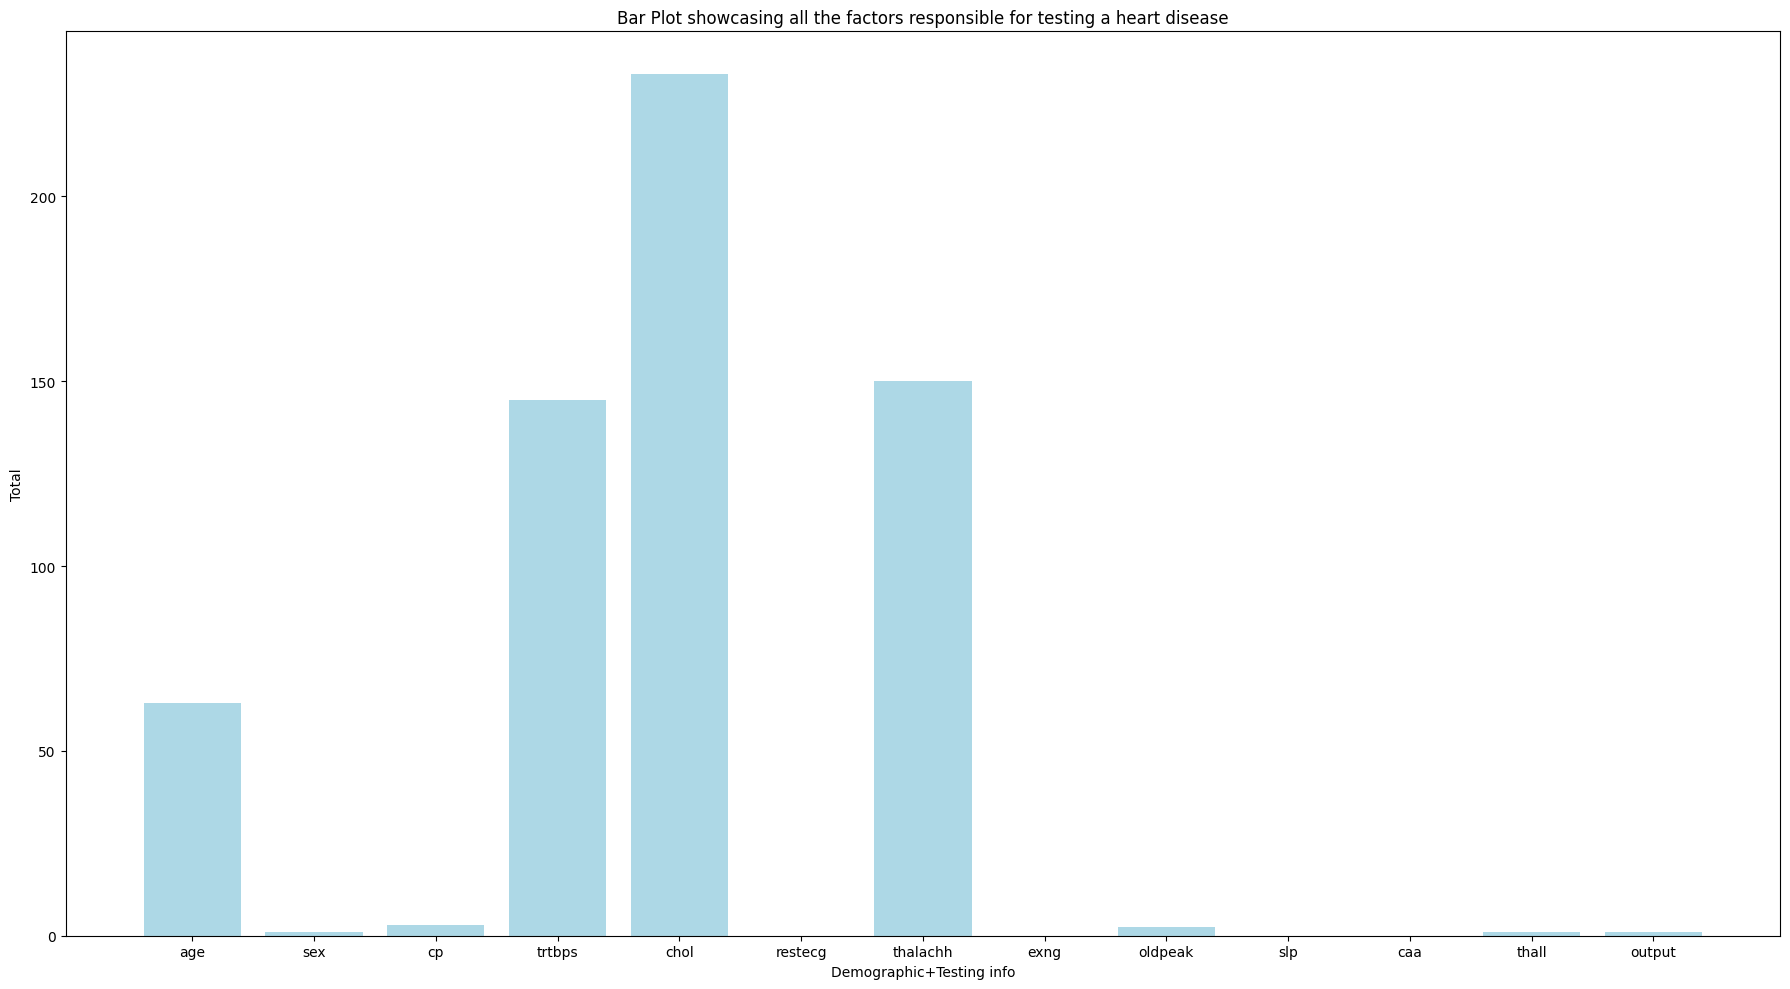

In [37]:
mt.figure(figsize=(18,10))
mt.title('Bar Plot showcasing all the factors responsible for testing a heart disease')
mt.bar(labels,values,color='lightblue')
mt.xlabel('Demographic+Testing info')
mt.ylabel('Total')
mt.tight_layout()
mt.show()

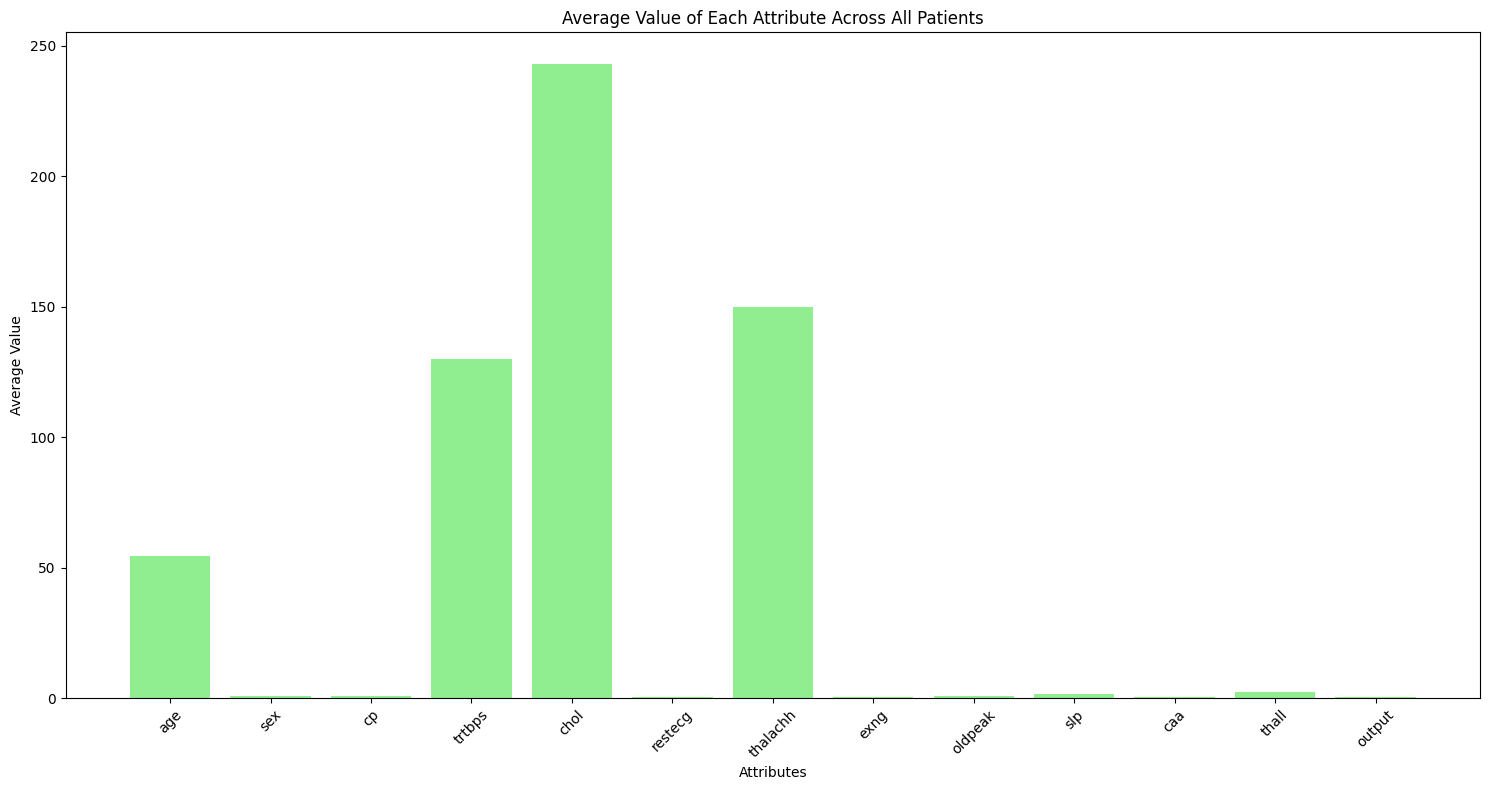

In [38]:
avg_values = df.mean(numeric_only=True)

# Plot
mt.figure(figsize=(15, 8))
mt.bar(avg_values.index, avg_values.values, color='lightgreen')
mt.title('Average Value of Each Attribute Across All Patients')
mt.xlabel('Attributes')
mt.ylabel('Average Value')
mt.xticks(rotation=45)
mt.tight_layout()
mt.show()

In [ ]:
df =